In [1]:
import numpy as np
import matplotlib.pyplot as plt
import run_simple_energy_loss

Momentem range is (1,30 GeV).
Number of bins 50.


#### Next we will load the simulation. 
 - It will take a numpy array with dimension M x N as input.
    - M number of design points
    - N number of model parameters of the model
 - It will return a M x P numpy array.
     - M number of design points
     - P number of Momentem bins
 - For more information please check the documentation for the function

In [2]:
simulation=run_simple_energy_loss.run_simulation

#### Make a design matrix

There are 6 parameters currently taken as model parameters. 
 - Initialization
     - T0_in_fm (deafult value 0.3/hbarc)
     - tau0 (deafult value 0.2)
     - Tf_in_fm (deafult value 0.15/hbarc)
 - Parton Energy loss rates
     - alpha_s (deafult value 0.1)
     - N_f (deafult value 0)
     - N_c (deafult value 3)

In [3]:
hbarc=0.1973
n_design = 20

In [4]:
# design for alpha_s parameter
T0_in_fm = np.full((n_design,1), 0.3/hbarc)
tau0 = np.full((n_design,1), 0.2)
Tf_in_fm = np.full((n_design,1), 0.15/hbarc)

# We will only consider the change in modle parameter for now
alpha_s = np.linspace(0.01,1,20).reshape(20,1)

N_f = np.full((n_design,1), 0)
N_c = np.full((n_design,1), 3)

design = np.vstack([T0_in_fm.T, tau0.T, Tf_in_fm.T, alpha_s.T, N_f.T, N_c.T])

# design matrix has to have M by N shape. Rows should be design points

design = design.T
print(f'Shape of the design is {design.shape}')

Shape of the design is (20, 6)


#### Run simulation for the 20 design points

In [5]:
observables=simulation(design)

The shape of design matrix is (20, 6)

Working on 0/20 designs


/Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/run_simple_energy_loss.py:291: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  res=scipy.integrate.quad(integrand, pmin, pmax, limit=10000, epsabs=1e-10, epsrel=1e-3)
/Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/run_simple_energy_loss.py:291: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  res=scipy.integrate.quad(integrand, pmin, pmax, limit=10000, epsabs=1e-10, epsrel=1e-3)


Working on 1/20 designs


/Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/run_simple_energy_loss.py:78: RuntimeWarning: invalid value encountered in log
  log_P_g=np.log(Pg_update(log_P_g_prev,T_in_GeV,dtau,dGamma_domega_inel))
/Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/run_simple_energy_loss.py:291: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  res=scipy.integrate.quad(integrand, pmin, pmax, limit=10000, epsabs=1e-10, epsrel=1e-3)
/Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/run_simple_energy_loss.py:291: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  res=scipy.integrate.quad(integrand, pmin, pmax, limit=10000, epsabs=1e-10, epsrel=1e-3)


Working on 2/20 designs
Working on 3/20 designs
Working on 4/20 designs
Working on 5/20 designs
Working on 6/20 designs
Working on 7/20 designs
Working on 8/20 designs
Working on 9/20 designs
Working on 10/20 designs
Working on 11/20 designs
Working on 12/20 designs
Working on 13/20 designs
Working on 14/20 designs
Working on 15/20 designs
Working on 16/20 designs
Working on 17/20 designs
Working on 18/20 designs
Working on 19/20 designs
Shape of the result array is (20, 50)


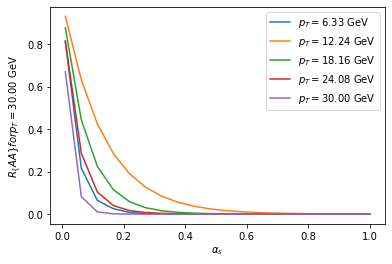

In [35]:
# Plot the observables

design_alpha=alpha_s.T
pt_list = np.linspace(1,30,50)
fig, ax = plt.subplots()
for i,pT in enumerate(pt_list):
    if (i%10) == 9:
        ax.plot(design_alpha.flatten(),observables[:,i], label=r'$p_T =$' +f'{pT:.2f} GeV')

ax.set_xlabel(r'$\alpha_s$')
ax.set_ylabel(r'$R_\{AA\} for p_T =$' +f'{pT:.2f} GeV')
ax.legend()    
